In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import PercentFormatter
import scipy.stats as stats
import datetime as dt
from sklearn.model_selection import train_test_split




pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("../Data/loan.csv")
print(df.shape)
df.head()

(887379, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['loan_status'].value_counts()

loan_status
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [8]:
df.describe(include='all')  

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379,887379.000000,887379.000000,887379,887379,835917,842554,887379,8.873750e+05,887379,887379,887379,887379,887379,126026,887379,887226,887379,887379,887379.000000,887350.000000,887350,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,869720,887379.000000,634408,887326,887234.000000,221703.000000,887379.0,887379,511.000000,509.000000,511,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,299271,11,6,NaN,3,103,10,2,887379,124468,14,63143,935,51,NaN,NaN,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,100,103,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Source Verified,Oct-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Aug-2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-2016,NaN,Feb-2016,Jan-2016,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,Not Verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,621125,NaN,NaN,254535,56323,13469,291569,443557,NaN,329558,48631,601779,887369,1,246,524215,414001,9770,129517,NaN,NaN,6659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470150,NaN,553406,730574,NaN,NaN,NaN,886868,NaN,NaN,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,NaN,13.246740,436.717127,NaN,NaN,NaN,NaN,NaN,7.502759e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.157039,0.314442,NaN,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,NaN,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,NaN,2164.145585,NaN,NaN,0.014380,44.104838,1.0,NaN,109981.011585,18.310118,NaN,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,NaN,4.381867,244.186593,NaN,NaN,NaN,NaN,NaN,6.469830e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.190626,0.862244,NaN,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,NaN,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,NaN,4794.783233,NaN,NaN,0.134191,22.179841,0.0,NaN,52730.379847,7.169233,NaN,0.077625,1.031137e+04,1.53

# Target

### Consolidating the target classes to binary. 


In Traditional banking industry a loan is considered to be in **Defauled** if it is 90 days past the due date.  "Late (16-30 days)", "Late (31-120 days)", and "In Grace Period" — are typically considered stages of delinquency, but not necessarily default.

Since my goal is to predict and mitigate the risk early I am going to consider any loan that has crossed the grace period as a default.

 
**Fully Paid : (Default = 0)**

Indicates that the borrower has successfully repaid the entire loan amount, including any interest or fees. The loan has been closed, and there is no outstanding balance.

**Charged Off : (Deafult = 1)**

Occurs when a borrower has defaulted on their loan and the lender considers the debt as unlikely to be fully repaid. The lender writes off the loan as a loss and typically reports it as such on their financial statements.

**Current : (Default = 0)**

Refers to a loan or credit account that is in good standing and has no missed payments or outstanding issues. The borrower is making regular payments according to the agreed-upon terms.


**Default : (Default = 1)**

Signifies a severe delinquency where the borrower has failed to make payments for an extended period. Defaulting on a loan can have serious consequences, including legal action and damage to the borrower's credit score.

**Late (31-120 days) : (Default = 1)**

Denotes that the borrower has missed multiple consecutive payments and is behind on their repayment schedule. The number in parentheses indicates the number of days the borrower is past due.

**In Grace Period : (Default = 0)**

Refers to a short period (typically a few days) after the payment due date during which the borrower can make a payment without incurring any late fees or penalties. It serves as a buffer to give the borrower some additional time to make the payment.

**Late (16-30 days) : (Default = 1)**

Similar to "Late (31-120 days)," this status signifies that the borrower has missed one or more payments, but the number of days past due is shorter.

**Does not meet the credit policy. Status:Fully Paid : (Default = 0)**

 Indicates that the loan or credit application was initially approved and funded, even though it did not meet the lender's standard credit policy. However, the borrower has successfully repaid the loan in full.

**Does not meet the credit policy. Status:Charged Off : (Default = 1)**

Indicates that the loan or credit application did not meet the lender's credit policy requirements and, as a result, the loan has been charged off as a loss because it is unlikely to be fully repaid.

**Issued : (These observations will be dropped as we never know the future payment behavior of these customers, and including them in the model will create a bias)** 

Indicates that a loan has been approved and the funds have been disbursed to the borrower. The borrower is now responsible for repaying the loan according to the agreed-upon terms.

In [9]:
x = df.shape[0]
df1 = df[df['loan_status']!= "Issued"]
print("Removed {} rows".format(x - df1.shape[0]))

Removed 8460 rows


In [10]:
defaulted_values  = ["Charged Off", "Default", "Late (31-120 days)", "Late (16-30 days)",
                     "Does not meet the credit policy. Status:Charged Off"]

df1['Default'] = [1 if x in defaulted_values else 0 for x in df1['loan_status']]

Dropping ID and member_id columns as they are unique identifiers and will not be useful for the model.

In [11]:
df1.drop(["id",'member_id'],axis = 1, inplace=True)

In [12]:
df1.head()  

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,Default
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
df1.shape

(878919, 73)

# Filtering features

In the given data, out of 71 independent features from the target, most of them will not be available during the time of application. So, I am going to filter the features that will be available during the time of application.

In [14]:
list(df1.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',

In [15]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# issued date,  will not be present at the time of loan application but I will keep it for future analysis and also to use it as a proxy for the time of loan application
# the reason for removing employee title which would be an important feature is that it has too many unique values and it would be difficult to encode it

available_features = ["loan_amnt","term","emp_length",'home_ownership', 'annual_inc','verification_status',
                      "issue_d", 'purpose', "addr_state",'dti','delinq_2yrs',"earliest_cr_line","mths_since_last_delinq",
                      "mths_since_last_record","open_acc","revol_bal","revol_util","total_acc","application_type","dti_joint","annual_inc_joint", "Default"]

df1 = df1[available_features]
print(df1.shape)
df1.head()

(878919, 22)


,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,application_type,dti_joint,annual_inc_joint,Default
0,5000.0,36 months,10+ years,RENT,24000.0,Verified,Dec-2011,credit_card,AZ,27.65,0.0,Jan-1985,NaN,NaN,3.0,13648.0,83.7,9.0,INDIVIDUAL,NaN,NaN,0
1,2500.0,60 months,< 1 year,RENT,30000.0,Source Verified,Dec-2011,car,GA,1.00,0.0,Apr-1999,NaN,NaN,3.0,1687.0,9.4,4.0,INDIVIDUAL,NaN,NaN,1
2,2400.0,36 months,10+ years,RENT,12252.0,Not Verified,Dec-2011,small_business,IL,8.72,0.0,Nov-2001,NaN,NaN,2.0,2956.0,98.5,10.0,INDIVIDUAL,NaN,NaN,0
3,10000.0,36 months,10+ years,RENT,49200.0,Source Verified,Dec-2011,other,CA,20.00,0.0,Feb-1996,35.0,NaN,10.0,5598.0,21.0,37.0,INDIVIDUAL,NaN,NaN,0
4,3000.0,60 months,1 year,RENT,80000.0,Source Verified,Dec-2011,other,OR,17.94,0.0,Jan-1996,38.0,NaN,15.0,27783.0,53.9,38.0,INDIVIDUAL,NaN,NaN,0


# EDA
Performing EDA on the filtered features to understand the data better.

Text(0.5, 1.0, 'Distribution of Loan Amount')

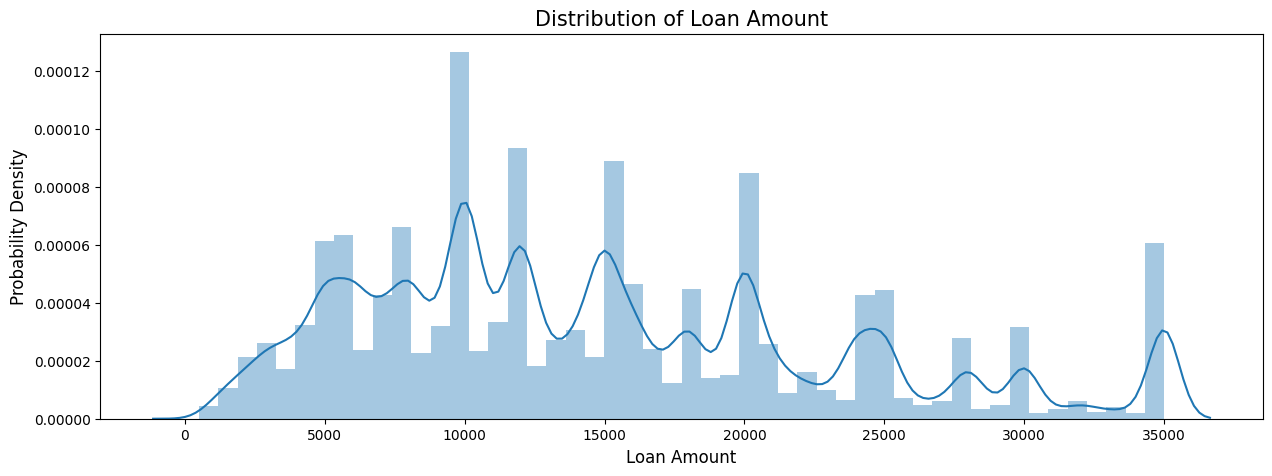

In [17]:
# understanding the distribution of loan amount
plt.figure(figsize=(15,5))
sns.distplot(df1['loan_amnt'])
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.title("Distribution of Loan Amount", fontsize=15)

Text(0.5, 1.0, 'Distribution of Term')

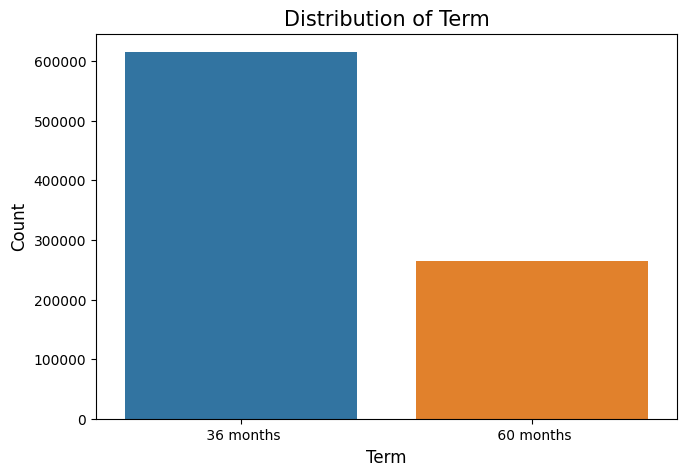

In [18]:
# understanding the distribution of term
plt.figure(figsize=(7.5,5))
vc = df1['term'].value_counts()
sns.barplot(x = vc.index, y=vc.values, palette="tab10")
plt.xlabel("Term", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Term", fontsize=15)

Text(0.5, 1.0, 'Percentage of Defaulters in each Term')

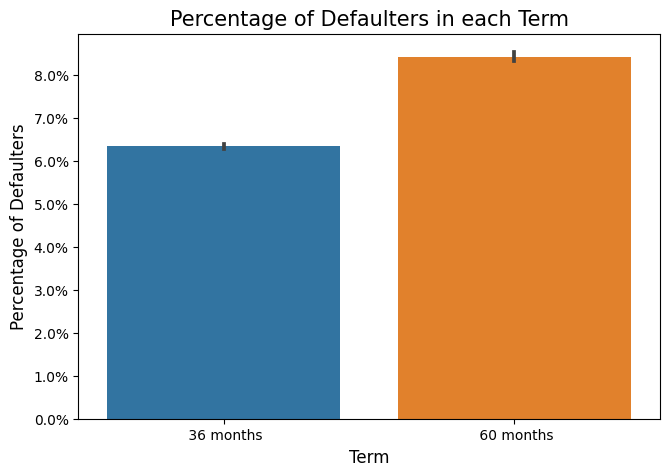

In [19]:
# understanding percentage of defaulters in each term
plt.figure(figsize=(7.5,5))
sns.barplot(x = df1['term'], y=df1['Default'], palette="tab10")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Term", fontsize=12)
plt.ylabel("Percentage of Defaulters", fontsize=12)
plt.title("Percentage of Defaulters in each Term", fontsize=15)

In [20]:
# Hypothesis testing if Term has an impact on Default
contingency_table = pd.crosstab(df1['term'], df1['Default'])

# Perform the Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(contingency_table)
print("Chi-square statistic: ", chi2)
print("p-value: ", p)

Default          0      1
term                     
 36 months  576187  38956
 60 months  241556  22220
Chi-square statistic:  1246.0876774856347
p-value:  5.879180326108888e-273


There are few observations from the plots.

* $10,000 is the most common loan amount, followed by $15,000.
* Most of the popular loan amounts are in multiples of $5,000.
* The most common term is 36 months.
* Customers who have opted for 60 months term have a higher default rate than the customers who have opted for 36 months term.
* From the Hypothesis testing we can clearly state that Default is dependent on on the length of term selected by customer and this could play an important role in predicting the default rate.

Text(0.5, 1.0, 'Distribution of Employment Length')

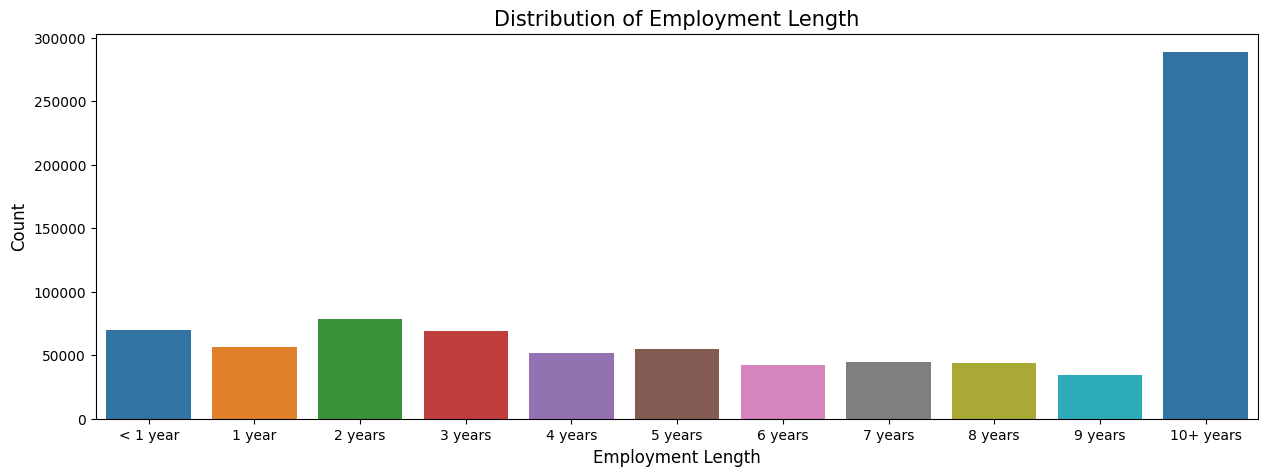

In [21]:
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
df1.dropna(subset=['emp_length'], inplace=True)
vc = df1['emp_length'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(x = vc.index, y=vc.values, palette="tab10", order=emp_length_order)
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Employment Length", fontsize=15)

Text(0.5, 1.0, 'Percentage of Defaulters in each Employment Length')

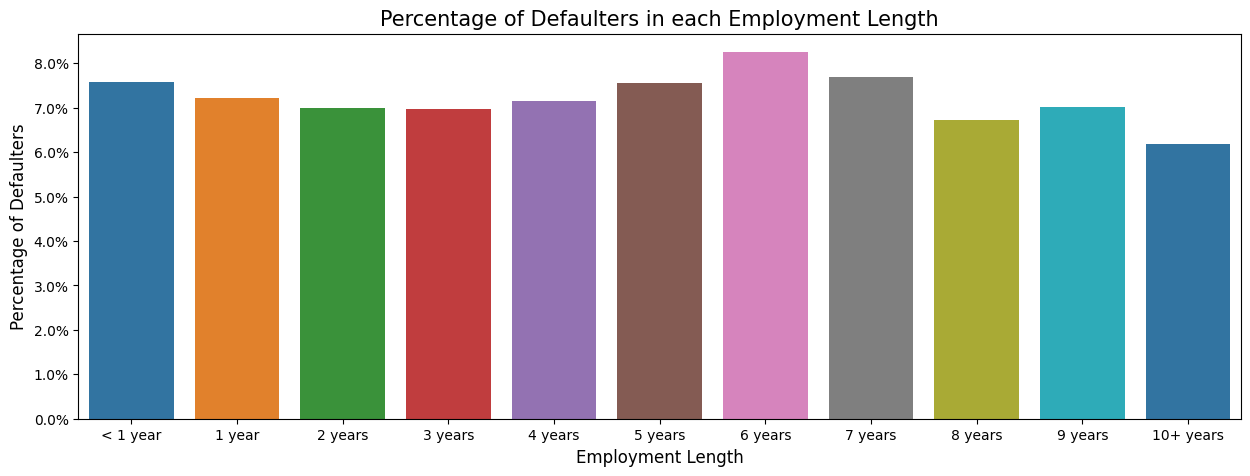

In [22]:
# percentage of defaulters in each employment length
default_per_length = df1.groupby('emp_length')['Default'].mean().sort_index()*100
plt.figure(figsize=(15,5))
sns.barplot(x = default_per_length.index, y=default_per_length.values, palette="tab10", order=emp_length_order)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Percentage of Defaulters", fontsize=12)
plt.title("Percentage of Defaulters in each Employment Length", fontsize=15)

In [23]:
# # Hypothesis testing if Term has an impact on Default
# contingency_table = pd.crosstab(df1['emp_length'], df1['Default'])

# # Perform the Chi-Square Test
# chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# # Print the results
# print(contingency_table)
# print("Chi-square statistic: ", chi2)
# print("p-value: ", p)

In [24]:
ownership = ['RENT', 'OWN', 'MORTGAGE']
shape = df1.shape[0]
df1 = df1[df1['home_ownership'].isin(ownership)]
print("Removed {} rows".format(shape - df1.shape[0]))

Removed 231 rows


Text(0.5, 1.0, 'Distribution of Home Ownership')

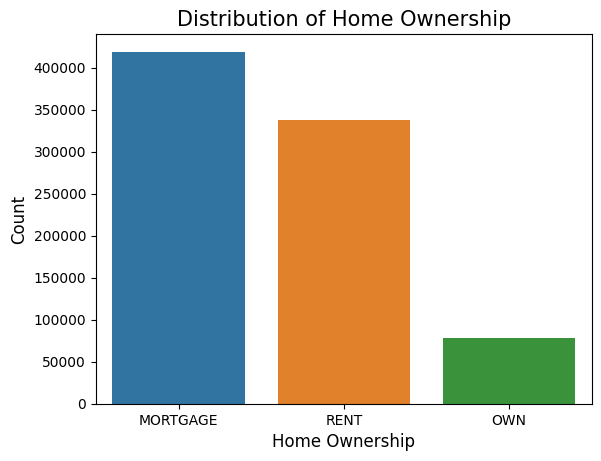

In [25]:
vc = df1['home_ownership'].value_counts()
sns.barplot(x = vc.index, y = vc.values)
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Home Ownership", fontsize=15)


Text(0.5, 1.0, 'Percentage of Defaulters in each Home Ownership')

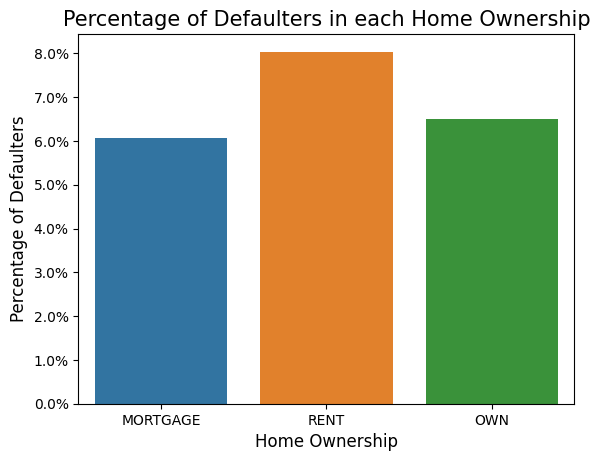

In [26]:
# finding out the percentage of defaulters in each home ownership category
x = df1.groupby('home_ownership')['Default'].mean().sort_values(ascending=False)*100
sns.barplot(x = x.index, y = x.values, order = vc.index)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Percentage of Defaulters", fontsize=12)
plt.title("Percentage of Defaulters in each Home Ownership", fontsize=15)


Default rate of customers who rent a house is higher than the customers who own a house followed by customers who have a mortgage.


Text(0.5, 1.0, 'Distribution of Annual Income')

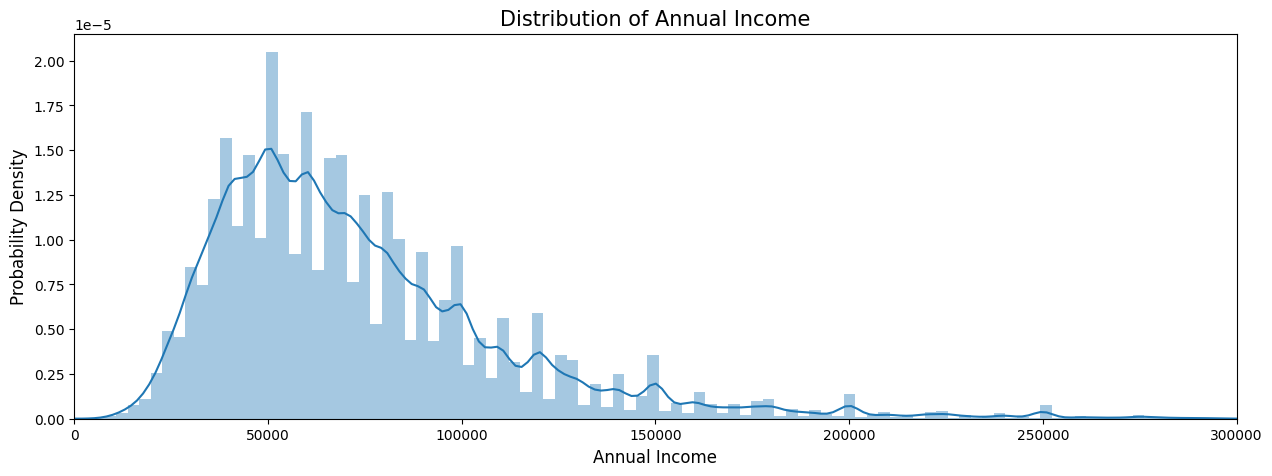

In [27]:
plt.figure(figsize=(15,5))
sns.distplot(df1.loc[df1['annual_inc']<300000,'annual_inc'], kde=True, bins=100)
plt.xlim(0, 300000) 
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.title("Distribution of Annual Income", fontsize=15)

Text(0.5, 1.0, 'Distribution of Annual Income')

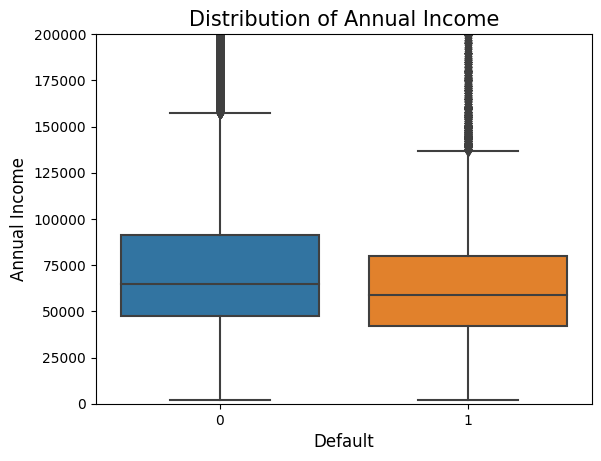

In [28]:
sns.boxplot(x = 'Default', y = 'annual_inc',data = df1)
plt.ylim(0, 200000)
plt.xlabel("Default", fontsize=12)  
plt.ylabel("Annual Income", fontsize=12)
plt.title("Distribution of Annual Income", fontsize=15)

Instead of dropping the outliers and loosing the data, I will create a new feature which will flag the outliers in the annual_income column.
This will help in preserving the data and also helps in identifying the outliers.

In [29]:
# creating a new feature which flags the applicants with annual income greater 1.5 times inter quartile range

q3 = df1['annual_inc'].quantile(0.75)
q1 = df1['annual_inc'].quantile(0.25)
iqr = q3 - q1
outlier = q3 + 1.5*iqr

df1['income_flag'] = [1 if x > outlier else 0 for x in df1['annual_inc']]


Text(0.5, 1.0, 'Distribution of Verification Status')

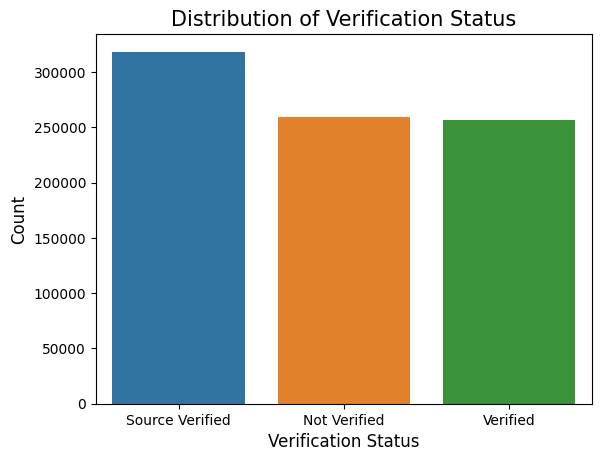

In [30]:
vc = df1['verification_status'].value_counts()
sns.barplot(x = vc.index, y = vc.values)
plt.xlabel("Verification Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Verification Status", fontsize=15)


Text(0.5, 1.0, 'Percentage of Defaulters in each Verification Status')

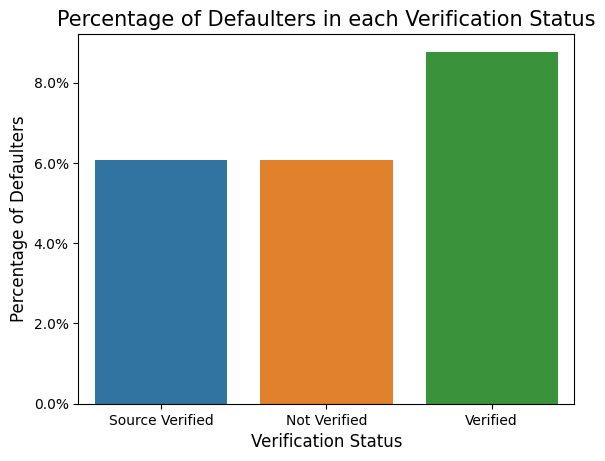

In [31]:
# finding out the percentage of defaulters in each home ownership category
x = df1.groupby('verification_status')['Default'].mean().sort_values(ascending=False)*100
sns.barplot(x = x.index, y = x.values, order = vc.index)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.xlabel("Verification Status", fontsize=12)
plt.ylabel("Percentage of Defaulters", fontsize=12)
plt.title("Percentage of Defaulters in each Verification Status", fontsize=15)


This seems to be odd, as Verification of user provided details are done to avoid frauds. But, the default rate of customers who have verified have more default rate than the customers who have not verified or who has source verified status.

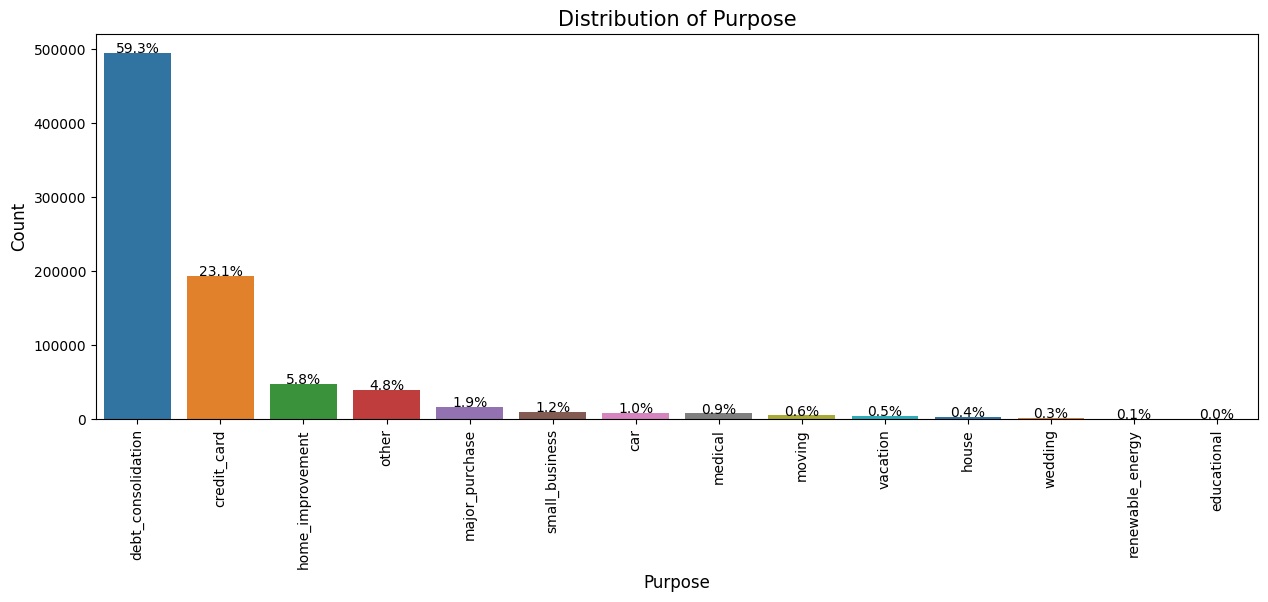

In [32]:
vc = df1['purpose'].value_counts()
plt.figure(figsize=(15,5))
percentage = list((df1['purpose'].value_counts(normalize=True)*100).values)

ax = sns.barplot(x = vc.index, y = vc.values, palette="tab10")
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.xticks(rotation=90)
plt.xlabel("Purpose", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Purpose", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Percentage of Defaulters in each Purpose')

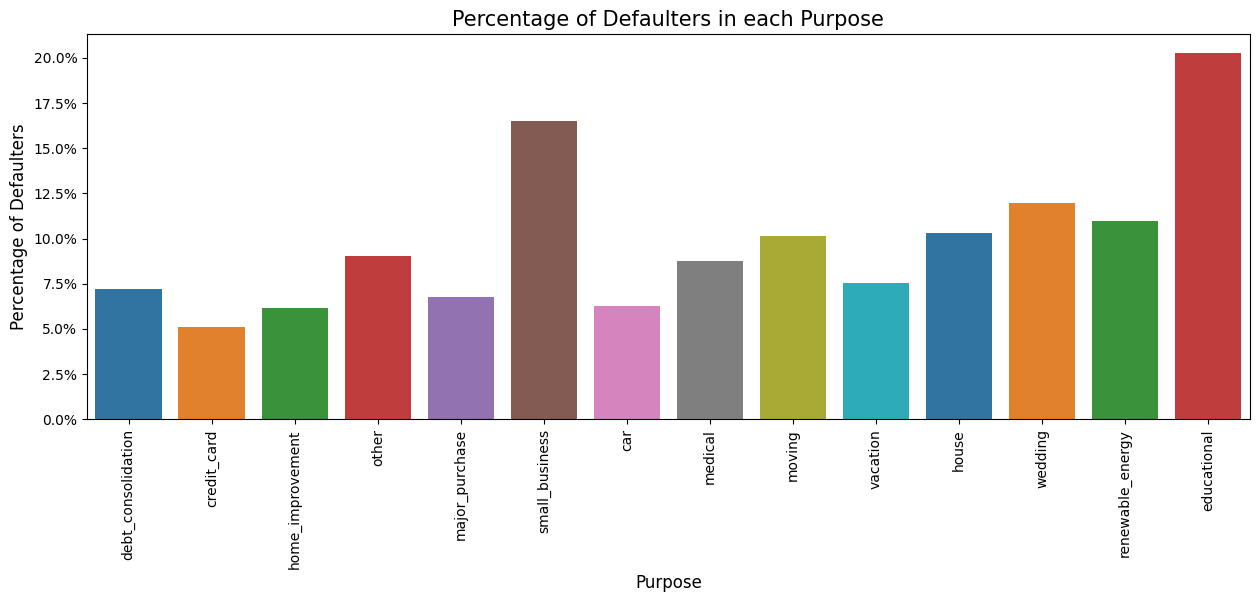

In [33]:
purpose_default_vc = df1.groupby('purpose')['Default'].mean().sort_values(ascending=False)*100

plt.figure(figsize=(15,5))
sns.barplot(x = purpose_default_vc.index, y = purpose_default_vc.values, order = vc.index, palette="tab10")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.xlabel("Purpose", fontsize=12)
plt.ylabel("Percentage of Defaulters", fontsize=12)
plt.title("Percentage of Defaulters in each Purpose", fontsize=15)


The most common purpose for which the loan is taken is for debt consolidation followed by credit card and home improvement.
Though education is the least common purpose, the default rate is highest.

In [34]:
state_counts = df1['addr_state'].value_counts(normalize=True) * 100
state_data = pd.DataFrame({'State': state_counts.index, 'Percentage': state_counts.values})

# Use the choropleth map to visualize the data
fig = px.choropleth(state_data, 
                    locations='State', 
                    locationmode='USA-states', 
                    color='Percentage', 
                    scope='usa',
                    color_continuous_scale='Blues',
                    title='States with the highest number of Credit applications')

# Customize the appearance of the map
fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    coloraxis_colorbar=dict(title='Percentage'),
    showlegend=False
)

# Display the map
fig.show()


In [35]:
state_default = df1.groupby('addr_state')['Default'].mean().sort_values(ascending=False)*100
state_default_per = pd.DataFrame({'State': state_default.index, 'Percentage': state_default.values})

# Use the choropleth map to visualize the data
fig = px.choropleth(state_default_per, 
                    locations='State', 
                    locationmode='USA-states', 
                    color='Percentage', 
                    scope='usa',
                    color_continuous_scale='RdYlGn_r',
                    title='States with the highest default rate')

# Customize the appearance of the map
fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    coloraxis_colorbar=dict(title='Percentage'),
    showlegend=False
)

# Display the map
fig.show()


From the Statewise analyis we see that with 14.6% of all credits issued, california ranks #1 and Idaho ranks last with only 0.001% of all credits issued.

When it comes to state with highest default rate, Iowa ranks #1 with 23.07% of credit defaults.

Creating new feature "Credit_days" which shows number of days since the customer has opened his/her first credit account.

In [36]:
df1['issue_d'] = pd.to_datetime(df1['issue_d'])
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'])
df1['Credit_years'] = np.round((df1['issue_d'] - df1['earliest_cr_line']).dt.days/365.25,0)
df1.drop(['issue_d','earliest_cr_line'], axis=1, inplace=True)
df1.head()

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,application_type,dti_joint,annual_inc_joint,Default,income_flag,Credit_years
0,5000.0,36 months,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,0.0,NaN,NaN,3.0,13648.0,83.7,9.0,INDIVIDUAL,NaN,NaN,0,0,27.0
1,2500.0,60 months,< 1 year,RENT,30000.0,Source Verified,car,GA,1.00,0.0,NaN,NaN,3.0,1687.0,9.4,4.0,INDIVIDUAL,NaN,NaN,1,0,13.0
2,2400.0,36 months,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,0.0,NaN,NaN,2.0,2956.0,98.5,10.0,INDIVIDUAL,NaN,NaN,0,0,10.0
3,10000.0,36 months,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,0.0,35.0,NaN,10.0,5598.0,21.0,37.0,INDIVIDUAL,NaN,NaN,0,0,16.0
4,3000.0,60 months,1 year,RENT,80000.0,Source Verified,other,OR,17.94,0.0,38.0,NaN,15.0,27783.0,53.9,38.0,INDIVIDUAL,NaN,NaN,0,0,16.0


51.17% of the observations have null values in the feature 'months since last delinquency'


Text(0.5, 1.0, 'Distribution of Months since last delinquency')

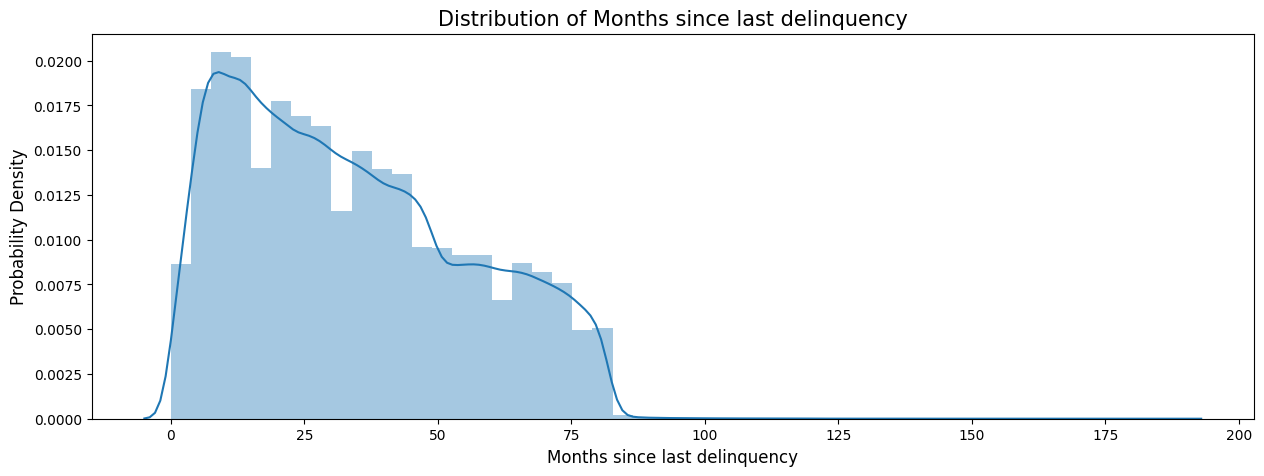

In [37]:
print("{}% of the observations have null values in the feature 'months since last delinquency'".format(round(df1['mths_since_last_delinq'].isnull().sum()/df1.shape[0]*100,2)))
plt.figure(figsize=(15,5))
sns.distplot(df1['mths_since_last_delinq'])
plt.xlabel("Months since last delinquency", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.title("Distribution of Months since last delinquency", fontsize=15)


Understanding what null value mean in the feature "mths_since_last_delinq".

This means that the customer has never had a delinquency. So, I am going to replace the null values with 999, and also I am going to add a new binary categorical feature which will flag the null values and represents the customer has never had a delinquency in the past

***Using this method will not allow us to use distance based algorithms like KNN or linear models like Logistic regression.***

In [38]:
# creating a new binary feature indicating if a customer ever had a delinquency and filling the null values with 999
df1['had_delinquency'] = [1 if x > 0 else 0 for x in df1['mths_since_last_delinq']]
df1['mths_since_last_delinq'].fillna(999, inplace=True)
df1.head()

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,application_type,dti_joint,annual_inc_joint,Default,income_flag,Credit_years,had_delinquency
0,5000.0,36 months,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,0.0,999.0,NaN,3.0,13648.0,83.7,9.0,INDIVIDUAL,NaN,NaN,0,0,27.0,0
1,2500.0,60 months,< 1 year,RENT,30000.0,Source Verified,car,GA,1.00,0.0,999.0,NaN,3.0,1687.0,9.4,4.0,INDIVIDUAL,NaN,NaN,1,0,13.0,0
2,2400.0,36 months,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,0.0,999.0,NaN,2.0,2956.0,98.5,10.0,INDIVIDUAL,NaN,NaN,0,0,10.0,0
3,10000.0,36 months,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,0.0,35.0,NaN,10.0,5598.0,21.0,37.0,INDIVIDUAL,NaN,NaN,0,0,16.0,1
4,3000.0,60 months,1 year,RENT,80000.0,Source Verified,other,OR,17.94,0.0,38.0,NaN,15.0,27783.0,53.9,38.0,INDIVIDUAL,NaN,NaN,0,0,16.0,1


Similar to how we handeled the null values in "mths_since_last_delinq", I am going to replace the null values in "mths_since_last_record" with 999 and also add a new binary categorical feature which will flag the null values and represents the customer has never had a public record in the past.

In [39]:
# creating a new binary feature indicating if a customer ever had a pubilc record in the past and filling the null values with 999
df1['had_record'] = [1 if x > 0 else 0 for x in df1['mths_since_last_record']]
df1['mths_since_last_record'].fillna(999, inplace=True)
df1.head()

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,application_type,dti_joint,annual_inc_joint,Default,income_flag,Credit_years,had_delinquency,had_record
0,5000.0,36 months,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,0.0,999.0,999.0,3.0,13648.0,83.7,9.0,INDIVIDUAL,NaN,NaN,0,0,27.0,0,0
1,2500.0,60 months,< 1 year,RENT,30000.0,Source Verified,car,GA,1.00,0.0,999.0,999.0,3.0,1687.0,9.4,4.0,INDIVIDUAL,NaN,NaN,1,0,13.0,0,0
2,2400.0,36 months,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,0.0,999.0,999.0,2.0,2956.0,98.5,10.0,INDIVIDUAL,NaN,NaN,0,0,10.0,0,0
3,10000.0,36 months,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,0.0,35.0,999.0,10.0,5598.0,21.0,37.0,INDIVIDUAL,NaN,NaN,0,0,16.0,1,0
4,3000.0,60 months,1 year,RENT,80000.0,Source Verified,other,OR,17.94,0.0,38.0,999.0,15.0,27783.0,53.9,38.0,INDIVIDUAL,NaN,NaN,0,0,16.0,1,0


In [40]:
x = df1.shape[0]
df1.dropna(subset=['open_acc','revol_util'], inplace=True)
print(x-df1.shape[0], "rows dropped")

478 rows dropped


In [41]:
#if it is a joint application, we will replace the value of dti and annual_inc with the values of dti_joint and annual_inc_joint respectively
df1.loc[df1['application_type']=='JOINT', "dti"] = df1.loc[df1['application_type']=='JOINT', "dti_joint"]
df1.loc[df1['application_type']=='JOINT', "annual_inc"] = df1.loc[df1['application_type']=='JOINT', "annual_inc_joint"]
df1.drop(['dti_joint', 'annual_inc_joint'], axis=1, inplace=True)
df1.dropna(subset=['dti'], inplace=True)

In [70]:
df1.isnull().sum()

loan_amnt                 0
term                      0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
mths_since_last_delinq    0
mths_since_last_record    0
open_acc                  0
revol_bal                 0
revol_util                0
total_acc                 0
application_type          0
Default                   0
income_flag               0
Credit_years              0
had_delinquency           0
had_record                0
dtype: int64

In [43]:
df1.head()

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,application_type,Default,income_flag,Credit_years,had_delinquency,had_record
0,5000.0,36 months,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,0.0,999.0,999.0,3.0,13648.0,83.7,9.0,INDIVIDUAL,0,0,27.0,0,0
1,2500.0,60 months,< 1 year,RENT,30000.0,Source Verified,car,GA,1.00,0.0,999.0,999.0,3.0,1687.0,9.4,4.0,INDIVIDUAL,1,0,13.0,0,0
2,2400.0,36 months,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,0.0,999.0,999.0,2.0,2956.0,98.5,10.0,INDIVIDUAL,0,0,10.0,0,0
3,10000.0,36 months,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,0.0,35.0,999.0,10.0,5598.0,21.0,37.0,INDIVIDUAL,0,0,16.0,1,0
4,3000.0,60 months,1 year,RENT,80000.0,Source Verified,other,OR,17.94,0.0,38.0,999.0,15.0,27783.0,53.9,38.0,INDIVIDUAL,0,0,16.0,1,0


In [71]:
df1.dtypes

loan_amnt                 float64
term                       object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
purpose                    object
addr_state                 object
dti                       float64
delinq_2yrs               float64
mths_since_last_delinq    float64
mths_since_last_record    float64
open_acc                  float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
application_type           object
Default                     int64
income_flag                 int64
Credit_years              float64
had_delinquency             int64
had_record                  int64
dtype: object

In [79]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# dummies = pd.get_dummies(df1, columns = list(df1.select_dtypes(include=['object']).columns), drop_first=True, dtype='int64')
# dummies.head()

In [73]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Default', axis=1), df1['Default'], test_size=0.3, random_state=42, stratify=df1['Default'])

In [74]:
from category_encoders import TargetEncoder


# Initialize the encoder
encoder = TargetEncoder()

# Fit and transform the features
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1, class_weight='balanced')

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = classification_report(y_test, rf_predictions)
print(rf_accuracy)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    232926
           1       0.20      0.00      0.00     17279

    accuracy                           0.93    250205
   macro avg       0.57      0.50      0.48    250205
weighted avg       0.88      0.93      0.90    250205



In [78]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train.columns = X_train.columns.str.replace('[', '_')
X_train.columns = X_train.columns.str.replace(']', '_')
X_train.columns = X_train.columns.str.replace('<', '_')

X_test.columns = X_test.columns.str.replace('[', '_')
X_test.columns = X_test.columns.str.replace(']', '_')
X_test.columns = X_test.columns.str.replace('<', '_')



# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', class_weight='balanced')

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = classification_report(y_test, xgb_predictions)
print(xgb_accuracy)

[22:12:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "class_weight" } are not used.

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    232926
           1       0.24      0.00      0.00     17279

    accuracy                           0.93    250205
   macro avg       0.59      0.50      0.48    250205
weighted avg       0.88      0.93      0.90    250205

